In [1]:
import os
os.getcwd()

import sys
sys.path.append('../../')

import pandas as pd


from RumourEval2019Models.RumourDataset import RumourDataset
from RumourEval2019Models.CLEARumor.src.dataset import get_conversations_from_archive
import RumourEval2019Models.utils as utils
    
# comment out if there is no such data frames in folder    
# conversation =  get_conversations_from_archive()
# rumour_dataset = RumourDataset(conversation)
# sdqc_train = utils.from_sdqc_to_df(rumour_dataset.sdqc_dataset.test,'sdqc_test')
# verif_train = utils.from_verif_to_df(rumour_dataset.verif_dataset.test,'verif_test')

# sdqc_train = utils.get_dfs_from_archive('sdqc_test')
# verif_train = utils.get_dfs_from_archive('verif_test')

# merged_train = utils.merge_sdqc_veracity(sdqc_train, verif_train)
# data =merged_train.drop(['conversation.source', 'conversation.replies', 'conversation','text'], axis=1)
data = utils.get_dfs_from_archive('branch_lstm')


In [2]:
# from RumourEval2019Models.utils import merge_answers
# merge_answers(data,'/Users/tmp/Documents/veracity-detection/data/answers/answer_branch_lstm.json','branch_lstm').head()

In [3]:
import numpy as np

# label_x -> sdqc , label_y -> veracity
# print random n rows
n_rows = 20
data.iloc[np.random.choice(np.arange(data.shape[0]),n_rows, False)]

,id_x,label_x,raw_text,depth,platform,has_media,source_id,topic,user_verified,followers_count,friends_count,upvote_ratio,created_at,user_name,id_y,label_y,branch_lstm_verif,branch_lstm_sdqc
500,784078691458551808,comment,@foxnewspolitics @USAneedsTRUMP @finnygo @JenG...,1,Platform.twitter,False,784071228248109057,clinton-ads,False,159,204,None,Thu Oct 06 17:11:42 +0000 2016,oigveh,784071228248109057,true,false,comment
354,915177757927182336,support,@SandraTXAS @carrieksada @SpecialKMB1969 @Choo...,1,Platform.twitter,False,914684276477710336,cnn-lies,False,3450,3823,None,Tue Oct 03 11:32:35 +0000 2017,lwsmcd,914684276477710336,unverified,false,comment
1332,dqzvkm8,comment,&gt; but its a sign of a dying society.\n\nA h...,2,Platform.reddit,False,7imq99,None,None,None,None,None,1.51283e+09,None,7imq99,true,true,comment
954,902199172786380800,comment,@VeganYogaDude @invisibleman_17 @Ms_Erica_Lynn...,1,Platform.twitter,False,902134516575346688,shark-hurricane,False,3316,2079,None,Mon Aug 28 16:00:19 +0000 2017,RoxanneDHoward,902134516575346688,false,false,comment
728,774187987798110208,comment,"@larryelder Sure, of course, since that is the...",1,Platform.twitter,False,774165935041093633,african-american,False,327,600,None,Fri Sep 09 10:09:34 +0000 2016,volunteerstarla,774165935041093633,true,true,comment
1623,dqg6pmv,comment,&gt; Trump's $10 million is for all of his tr...,4,Platform.reddit,False,7g16as,None,None,None,None,None,1.51186e+09,None,7g16as,false,false,comment
1042,905210389310398464,comment,@AMike4761 Arrest the racist thugs! Totally un...,1,Platform.twitter,False,905161219274940416,blm-hurricane,False,286,173,None,Tue Sep 05 23:25:49 +0000 2017,RealLeaderChip,905161219274940416,false,false,comment
1219,e3btcvb,comment,Ohhh... I appreciate it random guy/gal on the ...,5,Platform.reddit,False,938o5h,None,None,None,None,None,1.533e+09,None,938o5h,true,false,comment
1624,dqfuwo0,comment,These documents show Newsweek lied.\n\nConspiracy,2,Platform.reddit,False,7g16as,None,None,None,None,None,1.51184e+09,None,7g16as,false,false,comment
44,903543993308389378,comment,@LightfootInHwd Me either. I would be out of m...,1,Platform.twitter,False,903528113631584256,harvey-donations,False,25,105,None,Fri Sep 01 09:04:09 +0000 2017,dearing_shayne,903528113631584256,true,true,comment


In [4]:
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt 
# verified/unverified source accounts
fig, ax =plt.subplots(1,2)
source = data[(data['depth'] == 0)]
sns.countplot(data=source,hue='user_verified',x='label_y',ax=ax[0])
ax[0].set(xlabel='claim labels', ylabel='number of posts', title='verified/unverified accounts')

source = data[(data['depth'] == 0)]
sns.countplot(data=source,hue='user_verified',x='label_x',ax =ax[1])
ax[1].set(xlabel='stance labels', ylabel='number of posts', title='verified/unverified accounts')

fig.show()

/Users/tmp/Documents/veracity-detection/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


/Users/tmp/Documents/veracity-detection/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


0       986801053168488449
1       986803257409499136
2       986805122993926149
3       986802436278030336
4       986802975468290048
               ...        
1822               cek4pgt
1823               cekj113
1824               cejwglx
1825               cejz2c3
1826               cejw3pk
Name: id_x, Length: 1827, dtype: object


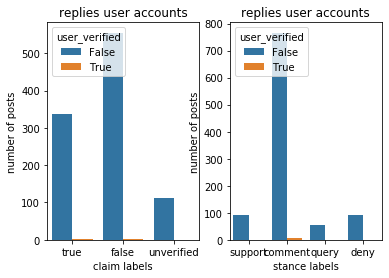

In [5]:
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt 
# verified/unverified source accounts
fig, ax =plt.subplots(1,2)
print(data.id_x)
data['id_x'] = data.id_x.apply(str)
replies = data[(data['source_id'] != data['id_x'])]
sns.countplot(data=replies,x='label_y',hue='user_verified',ax=ax[0])
ax[0].set(xlabel='claim labels', ylabel='number of posts', title='replies user accounts')

replies = data[(data['source_id'] != data['id_x'])]
sns.countplot(data=replies,x='label_x',hue='user_verified',ax =ax[1])
ax[1].set(xlabel='stance labels', ylabel='number of posts', title='replies user accounts')

fig.show()

/Users/tmp/Documents/veracity-detection/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


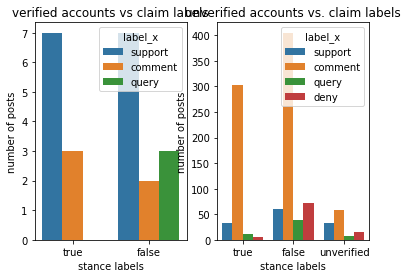

In [6]:
#number of sdqc based on false claims
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt 
# verified/unverified source accounts
fig, ax =plt.subplots(1,2)
source = data[data['user_verified'] == True]
sns.countplot(data=source,x='label_y',hue='label_x',ax=ax[0])
ax[0].set(xlabel='stance labels', ylabel='number of posts', title='verified accounts vs claim labels')

source = data[data['user_verified'] == False]
sns.countplot(data=source,x='label_y',hue='label_x',ax =ax[1])
ax[1].set(xlabel='stance labels', ylabel='number of posts', title='unverified accounts vs. claim labels')

fig.show()

In [7]:
#verified accounts who post and support false claims
mask = data[(data['user_verified'] == True)& (data['label_x'] == 'support') & (data['label_y']=='false') & (data['depth']==0)]
mask

,id_x,label_x,raw_text,depth,platform,has_media,source_id,topic,user_verified,followers_count,friends_count,upvote_ratio,created_at,user_name,id_y,label_y,branch_lstm_verif,branch_lstm_sdqc
97,938787800974950400,support,BREAKING: Illegal Muslim From Iran Arrested Fo...,0,Platform.twitter,False,938787800974950400,immigrants-wildfires,True,186847,57753,None,Thu Dec 07 15:10:28 +0000 2017,jjauthor,938787800974950400,false,false,support
592,934828842505723904,support,"""@KenyanTraffic: ""National Geographic channel ...",0,Platform.twitter,True,934828842505723904,nat-geo-footage,True,1570951,5867,None,Sun Nov 26 16:58:58 +0000 2017,Gidi_Traffic,934828842505723904,false,true,support
735,945845194699759616,support,Mike Pence Disappointed God Has Never Asked Hi...,0,Platform.twitter,True,945845194699759616,pence-sacrifice,True,11009025,14,None,Wed Dec 27 02:34:02 +0000 2017,TheOnion,945845194699759616,false,false,support
809,830469481621241857,support,Mike Pence Disappointed God Has Never Asked Hi...,0,Platform.twitter,True,830469481621241857,pence-sacrifice,True,11009032,14,None,Sat Feb 11 17:32:08 +0000 2017,TheOnion,830469481621241857,false,false,support
854,852844529778601985,support,#Breaking: Pentagon releases video of the “mot...,0,Platform.twitter,True,852844529778601985,afghanistan,True,4280227,8121,None,Fri Apr 14 11:22:35 +0000 2017,TODAYshow,852844529778601985,false,true,support
903,902224586967621633,support,"WTF RT @Jeggit: Believe it or not, this is a s...",0,Platform.twitter,True,902224586967621633,shark-hurricane,True,27125,323,None,Mon Aug 28 17:41:18 +0000 2017,jimmyvasser,902224586967621633,false,false,support


/Users/tmp/Documents/veracity-detection/venv/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


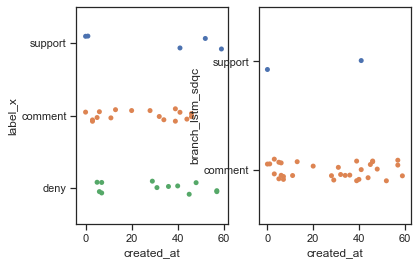

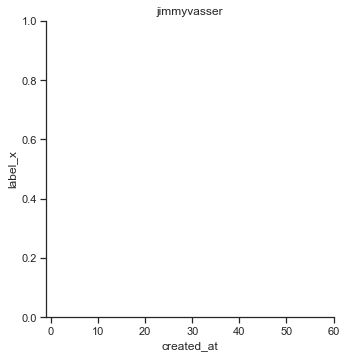

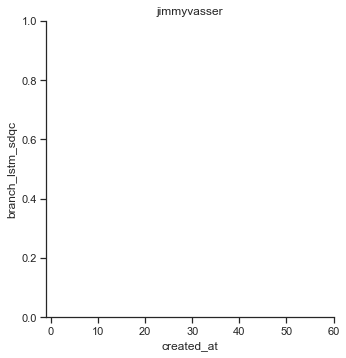

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from pandas.core.resample import TimeGrouper
from pandas.tseries.offsets import DateOffset

# false rumours initiated by verified accounts
id_checked = '938787800974950400'
replies = data[data['source_id'].isin(mask['id_x'])]
replies = replies[(replies.source_id == id_checked)]


replies['created_at'] = pd.to_datetime(replies['created_at']).dt.minute
fig, ax =plt.subplots(1,2)
# set index to 'created_at'
# sns.xlin(false_rumours_verif['created_at'].min(), false_rumours_verif['created_at'].max())

g = sns.catplot(y="label_x", x="created_at",data=replies, ax=ax[0])
plt.xlim(replies['created_at'].min()-1,replies['created_at'].max()+1)
plt.title(replies[(replies.id_x ==id_checked)].user_name.values[0])

g = sns.catplot(y="branch_lstm_sdqc", x="created_at",data=replies, ax=ax[1])
plt.xlim(replies['created_at'].min()-1,replies['created_at'].max()+1)
plt.title(replies[(replies.id_x ==id_checked)].user_name.values[0])
fig.show()

In [9]:
df = mask.groupby(['user_name'])['user_name'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)
df.head()

,user_name,count
2,TheOnion,2
0,Gidi_Traffic,1
1,TODAYshow,1
3,jimmyvasser,1
4,jjauthor,1


In [10]:
# from RumourEval2019Models.utils import merge_answers

# data.head()
# merge_answers(data,'/Users/tmp/Documents/veracity-detection/data/answers/answer_branch_lstm.json','branch_lstm').head()